#  User Advertisement Click - Data Analysis

### Import pandas library and the dataset

In [1]:
import pandas as pd

### load CSV data 

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


## View the data types and details of the columns

#### 1. Displaying details regarding continuous variables

In [3]:
## displaying the datatypes of the columns
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

# displaying the details regarding all the numerical columns

In [4]:
 
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,65.425800,35.903333,55315.072767,180.702344,0.483333,0.487778
std,15.712563,8.744462,13376.323458,43.823397,0.500000,0.500129
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,52.160000,29.000000,47494.787500,139.245000,0.000000,0.000000
50%,68.945000,35.000000,57631.345000,184.555000,0.000000,0.000000
75%,78.610000,41.000000,65666.300000,219.720000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


#### 2. Displaying details regarding categorical columns

In [5]:
import numpy as np
data.describe(include=[np.object])

,Ad Topic Line,City,Country,Timestamp
count,900,900,900,900
unique,900,875,234,897
top,Visionary reciprocal circuit,Lisamouth,Czech Republic,20/05/2016 12:17
freq,1,3,8,2


## Generating some insights from the data by analysis

### Assumptions

#### 1. Relation between Number of Clicks per Country

In [6]:
## List of unique countries
len(data['Country'].unique().tolist())

234

In [7]:
clicked_data = data[data['Clicked on Ad']==1]
clicked_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,07/03/2016 1:40,1
10,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,0,Qatar,16/03/2016 20:19,1
12,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,1,Egypt,03/06/2016 1:14,1
14,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,0,Barbados,24/03/2016 9:31,1
15,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,1,Spain,09/03/2016 3:41,1


In [8]:
countries_data = clicked_data.groupby(['Country'])['Clicked on Ad'].sum()
countries_data

Country
Afghanistan          5
Albania              3
Algeria              3
American Samoa       3
Andorra              2
                    ..
Wallis and Futuna    1
Western Sahara       4
Yemen                1
Zambia               3
Zimbabwe             4
Name: Clicked on Ad, Length: 205, dtype: int64

In [9]:
countries_data = countries_data.sort_values(ascending=False)
countries_data = countries_data.head(10)
countries_data

Country
Turkey            7
Australia         7
South Africa      6
Liechtenstein     6
Ethiopia          5
Peru              5
Hungary           5
Afghanistan       5
Czech Republic    4
France            4
Name: Clicked on Ad, dtype: int64

### Visualize the data of first 10 countries using bar chart

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

C:\Users\Aakansha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
sns.set()

In [13]:
countries_data

Country
Turkey            7
Australia         7
South Africa      6
Liechtenstein     6
Ethiopia          5
Peru              5
Hungary           5
Afghanistan       5
Czech Republic    4
France            4
Name: Clicked on Ad, dtype: int64

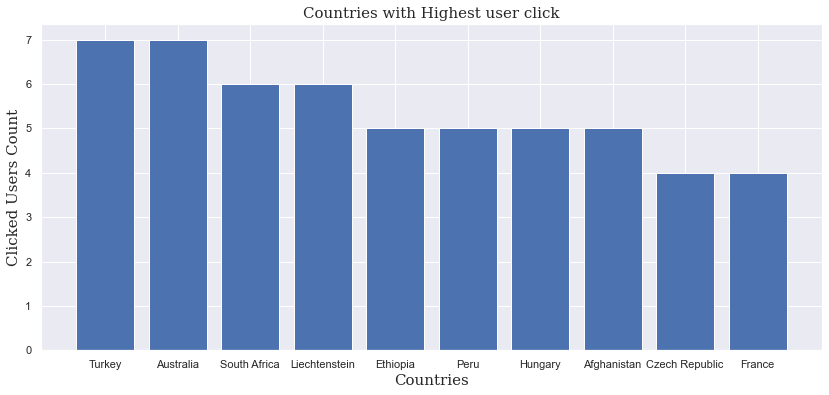

In [14]:
font_dict = {
    'family': 'serif',
    'size': 15
}
plt.figure(figsize=(14,6))
plt.bar(data=countries_data, x=countries_data.index, height=countries_data.values)
plt.xlabel('Countries', fontdict=font_dict)
plt.ylabel('Clicked Users Count', fontdict=font_dict)
plt.title('Countries with Highest user click', fontdict=font_dict)
plt.savefig('Countries-Highest-Click')
plt.show()

### 2. Is there any relation between the 'Daily Time spent on Site' and 'Clicked Ad' column?

In [15]:
## performing correlation test
data['Daily Time Spent on Site'].corr(data['Clicked on Ad'])

-0.7525701045280432

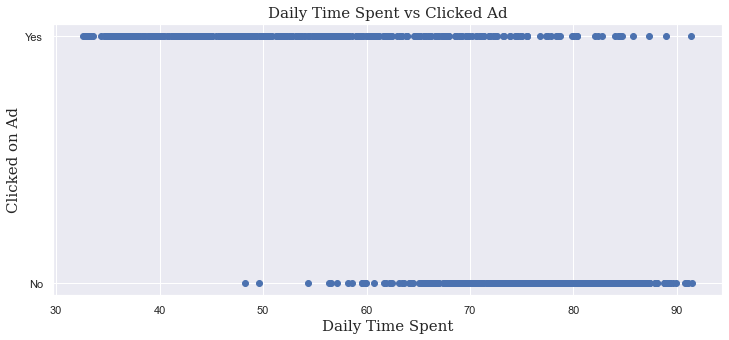

In [16]:
plt.figure(figsize=(12,5))
plt.xlabel('Daily Time Spent', fontdict=font_dict)
plt.ylabel('Clicked on Ad', fontdict=font_dict)
plt.yticks(np.arange(2), ['No', 'Yes'])
plt.scatter(data['Daily Time Spent on Site'],data['Clicked on Ad'])
plt.title('Daily Time Spent vs Clicked Ad', fontdict=font_dict)
plt.savefig('Time-Spent-vs-Clicked-Ad.png')
plt.show()

### 3. What is the probability that male or female is going to click on the advertisement?

In [17]:
## let's create a new dataframe that should have only persons who have clicked on the advertisement.
clicked_data['Male'].value_counts()

0    236
1    203
Name: Male, dtype: int64

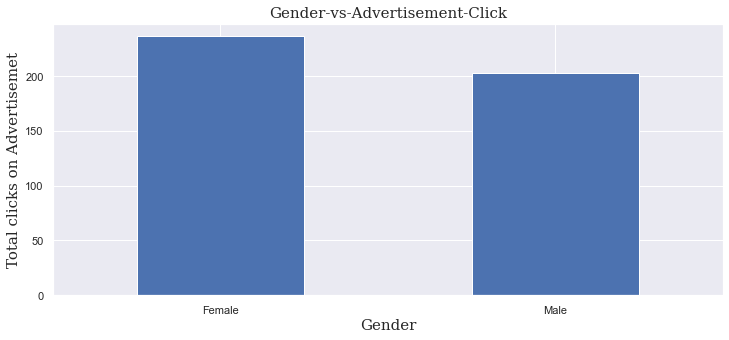

In [18]:
plt.figure(figsize=(12, 5))
clicked_data['Male'].value_counts().plot.bar()
plt.xlabel('Gender', fontdict=font_dict)
plt.ylabel('Total clicks on Advertisemet', fontdict=font_dict)
plt.title('Gender-vs-Advertisement-Click', fontdict=font_dict)
plt.xticks(clicked_data['Male'].unique(), ['Male', 'Female'], rotation=0)
plt.savefig('Gender-vs-Advertisement-Click.png')
plt.show()

### Create a stacked chart to see what percentage of male and female have clicked on advertisement

In [19]:
gender_ad_data = data.groupby(['Male'])['Clicked on Ad'].value_counts()
gender_ad_data

Male  Clicked on Ad
0     1                236
      0                229
1     0                232
      1                203
Name: Clicked on Ad, dtype: int64

In [20]:
total_females = data[data['Male']==0].shape[0]
total_females

465

In [21]:
percentage_female_clicked = data[(data['Male']==0) & (data['Clicked on Ad']==1)].shape[0]/total_females
percentage_female_clicked

0.5075268817204301

In [22]:
total_males = data[data['Male']==1].shape[0]
total_males

435

In [23]:
percentage_male_clicked = data[(data['Male']==1) & (data['Clicked on Ad']==1)].shape[0]/total_males
percentage_male_clicked

0.4666666666666667

In [24]:
## checking the percentage of advertisement click by female and male against the whole population

In [25]:
percentage_female_clicked = data[(data['Male']==0) & (data['Clicked on Ad']==1)].shape[0]/data.shape[0]
percentage_female_clicked

0.26222222222222225

In [26]:
percentage_female_clicked = data[(data['Male']==1) & (data['Clicked on Ad']==1)].shape[0]/data.shape[0]
percentage_female_clicked

0.22555555555555556

### 4. Is 'Age' and 'Area Income' makes the user to click on 'Advertisement' or not?

In [27]:
## let's create a heat map to get an overall picture regarding all the continuous variables.

In [28]:
import seaborn as sns

In [29]:
continuous_data = data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']]
continuous_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


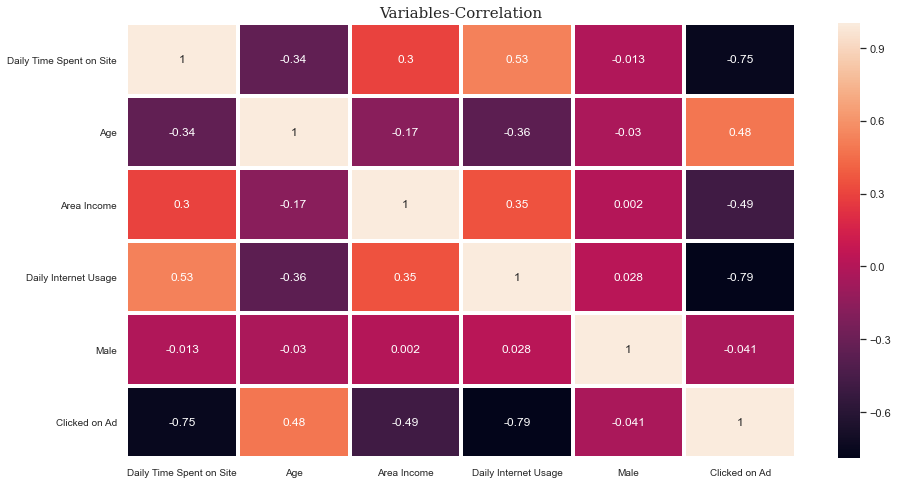

In [30]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, linecolor='white', linewidths=3)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Variables-Correlation', fontdict=font_dict)
plt.savefig('Variables-Correlation.png')
plt.show()

### Let's visualize how age is related with user's chances of clicking on the ad.

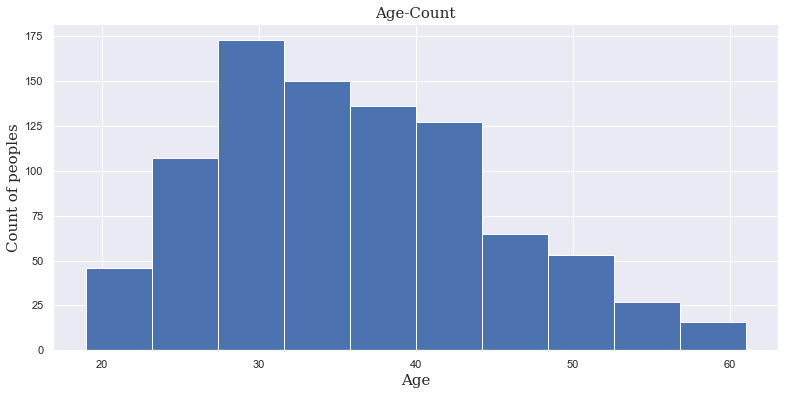

In [31]:
plt.figure(figsize=(13, 6))
data['Age'].plot.hist()
plt.xlabel('Age', fontdict=font_dict)
plt.ylabel('Count of peoples', fontdict=font_dict)
plt.title('Age-Count', fontdict=font_dict)
plt.savefig('Persons-Age.png')
plt.show()

### Converting age continuous data into categorical data to get bins

In [32]:
age_bins = pd.cut(data.Age, bins=[0, 10, 20, 30, 40, 50, 60, 70])
age_bins.value_counts().sort_index(ascending=True)

(0, 10]       0
(10, 20]     10
(20, 30]    264
(30, 40]    372
(40, 50]    190
(50, 60]     63
(60, 70]      1
Name: Age, dtype: int64

In [33]:

age_clicked_data = data[data['Clicked on Ad']==1]
age_clicked_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,07/03/2016 1:40,1
10,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,0,Qatar,16/03/2016 20:19,1
12,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,1,Egypt,03/06/2016 1:14,1
14,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,0,Barbados,24/03/2016 9:31,1
15,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,1,Spain,09/03/2016 3:41,1


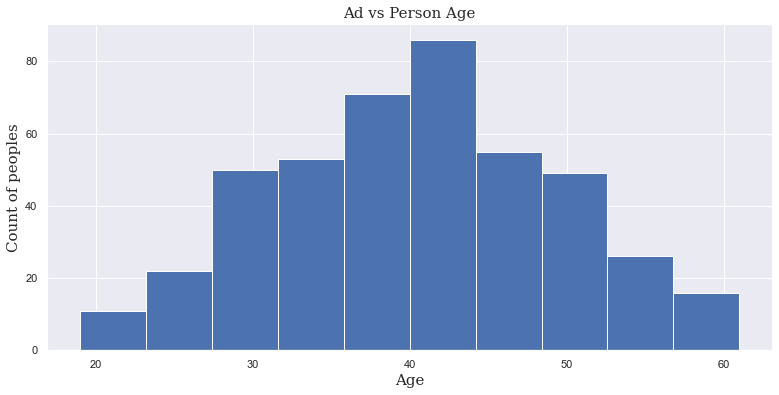

In [34]:
plt.figure(figsize=(13, 6))
age_clicked_data['Age'].plot.hist()
plt.xlabel('Age', fontdict=font_dict)
plt.ylabel('Count of peoples', fontdict=font_dict)
plt.title('Ad vs Person Age', fontdict=font_dict)
plt.savefig('Ad-vs-Person-Age.png')
plt.show()

In [35]:
age_bins = pd.cut(age_clicked_data.Age, bins=[0, 10, 20, 30, 40, 50, 60, 70])
age_bins.value_counts().sort_index(ascending=True)

(0, 10]       0
(10, 20]      2
(20, 30]     69
(30, 40]    153
(40, 50]    154
(50, 60]     60
(60, 70]      1
Name: Age, dtype: int64

In [36]:
age_bins = pd.DataFrame(age_bins.value_counts().sort_index(ascending=True))
age_bins.head()

,Age
"(0, 10]",0
"(10, 20]",2
"(20, 30]",69
"(30, 40]",153
"(40, 50]",154


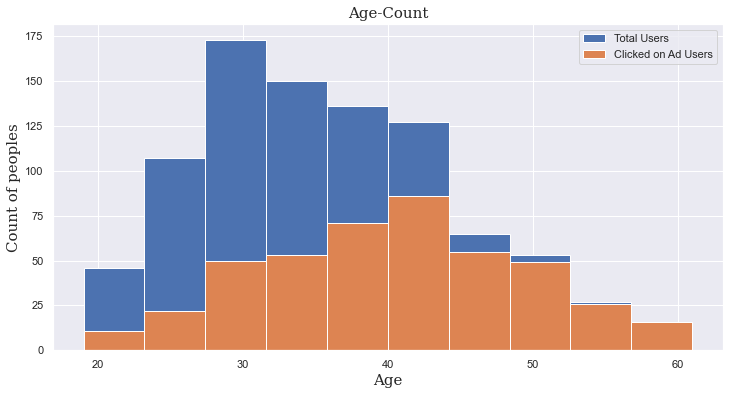

In [37]:
plt.figure(figsize=(12, 6))
data['Age'].plot.hist(label='Total Users')
data['Age'][data['Clicked on Ad']==1].plot.hist(label='Clicked on Ad Users')
plt.xlabel('Age', fontdict=font_dict)
plt.ylabel('Count of peoples', fontdict=font_dict)
plt.title('Age-Count', fontdict=font_dict)
plt.legend()
plt.savefig('Age-vs-Ad-Clicked-Probability.png')
plt.show()

In [38]:
age_list = [10, 20, 30, 40, 50, 60]
for x in age_list:
    click_age_probability = data[(data['Age']>x) & (data['Clicked on Ad']==1)].shape[0]/data[data['Age']>x].shape[0]
    print("Probability for ", x, "is: ", click_age_probability)

Probability for  10 is:  0.48777777777777775
Probability for  20 is:  0.4910112359550562
Probability for  30 is:  0.5878594249201278
Probability for  40 is:  0.8464566929133859
Probability for  50 is:  0.953125
Probability for  60 is:  1.0


In [39]:
len(data['City'].unique().tolist())

875

In [40]:
data['Timestamp_time'] = pd.to_datetime(data['Timestamp'], infer_datetime_format=True)
data['Timestamp_time'].head()

0   2016-03-27 00:53:00
1   2016-04-04 01:39:00
2   2016-03-13 20:35:00
3   2016-01-10 02:31:00
4   2016-06-03 03:36:00
Name: Timestamp_time, dtype: datetime64[ns]

In [41]:
## resample time for each hour
data_acc_time = data


In [42]:
data_acc_time = data_acc_time.set_index('Timestamp_time', drop=True)
data_acc_time.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Timestamp_time,,,,,,,,,,
2016-03-27 00:53:00,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
2016-04-04 01:39:00,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2016-03-13 20:35:00,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
2016-01-10 02:31:00,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
2016-06-03 03:36:00,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [43]:
hour_data = data_acc_time.resample('H').sum()
hour_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Timestamp_time,,,,,,
2016-01-01 02:00:00,80.67,34,58909.36,239.76,0,0
2016-01-01 03:00:00,0.00,0,0.00,0.00,0,0
2016-01-01 04:00:00,0.00,0,0.00,0.00,0,0
2016-01-01 05:00:00,0.00,0,0.00,0.00,0,0
2016-01-01 06:00:00,0.00,0,0.00,0.00,0,0


In [44]:
## extract hour information from the data
data_acc_time['Hour'] = data_acc_time.index.hour
data_acc_time.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour
Timestamp_time,,,,,,,,,,,
2016-03-27 00:53:00,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0,0
2016-04-04 01:39:00,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0,1
2016-03-13 20:35:00,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0,20
2016-01-10 02:31:00,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0,2
2016-06-03 03:36:00,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0,3


In [45]:
data_acc_time['Hour'].corr(data_acc_time['Clicked on Ad'])

-0.05744331636818698

In [46]:
## create heat map for
hour_corr = data_acc_time['Hour'].corr(data_acc_time['Clicked on Ad'])
hour_corr

-0.05744331636818698

In [47]:
hour_corr_data = data_acc_time[['Clicked on Ad', 'Hour']]
hour_corr_data.head()

,Clicked on Ad,Hour
Timestamp_time,,
2016-03-27 00:53:00,0,0
2016-04-04 01:39:00,0,1
2016-03-13 20:35:00,0,20
2016-01-10 02:31:00,0,2
2016-06-03 03:36:00,0,3


In [48]:
hour_corr_data = hour_corr_data.groupby(['Hour']).sum()
hour_corr_data

,Clicked on Ad
Hour,
0,25
1,13
2,13
3,19
4,16
5,18
6,22
7,23
8,18


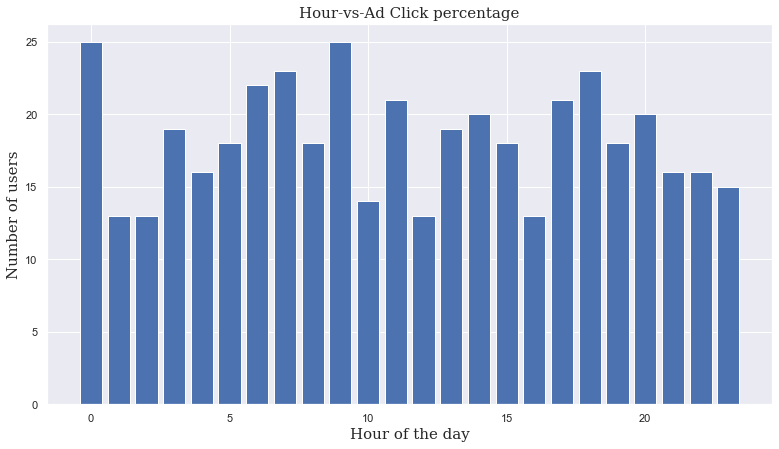

In [49]:
plt.figure(figsize=(13, 7))
plt.title('Hour-vs-Ad Click percentage', fontdict=font_dict)
plt.bar(data=hour_corr_data, x=hour_corr_data.index, height=hour_corr_data['Clicked on Ad'])
plt.xlabel('Hour of the day', fontdict=font_dict)
plt.ylabel('Number of users', fontdict=font_dict)
plt.savefig('Hour-vs-Ad-Click.png')
plt.show()

# Data Conclusion 